In [2]:
import numpy  as np
import pandas as pd
from scipy    import stats 
import seaborn as sea
import matplotlib.pyplot as plt
from   statsmodels.stats import diagnostic

In [3]:
data = pd.read_csv('exams.csv')

In [4]:
reading = data['reading score'].values
reading.shape

(1000,)

### Intervalo de confiança

$\alpha = (1-nivelDeConfianca)/2$ 

$Z_{critico} = Z(\alpha,n-1)$ 

margem de erro = $Z_c \cdot \frac{\sigma}{\sqrt{n}}$

t = $\frac{\bar{X} - \mu}{\frac{S}{\sqrt{n}}}$

1.

In [5]:
random  = np.random.RandomState(seed=42)
amostra = random.choice(reading, size=40)
amostra

array([78, 87, 92, 72, 74, 52, 39, 76, 74, 87, 85, 80, 69, 69, 93, 65, 54,
       44, 78, 75, 65, 81, 60, 70, 68, 61, 55, 86, 51, 76, 72, 98, 55, 78,
       52, 63, 91, 57, 46, 71])

In [6]:
tam = len(amostra)

nivel de confianção de 95%

In [7]:
nConf = 95/100
alpha = (1-nConf)/2

tcritico = abs(stats.t.ppf(alpha,tam-1))

In [8]:
E = tcritico * (np.std(amostra)/np.sqrt(tam))
E

4.587701715762118

In [9]:
R = f'''
{np.mean(amostra) - E} < mu <{np.mean(amostra) + E}
'''
print(R)
print('mu =', np.mean(reading))


65.38729828423787 < mu <74.56270171576212

mu = 69.002


Nivel de confiança de 50%

In [10]:
nConf = 99/100
alpha = (1 - nConf)/2

tc = -1*stats.t.ppf(alpha , tam)
tc

2.7044592674331502

In [11]:
E = tc * (np.std(amostra)/np.sqrt(tam))
E

6.134032812146739

In [12]:
R = f'''
{np.mean(amostra) - E} < mu <{np.mean(amostra) + E}
'''
print(R)
print('mu =', np.mean(reading))


63.84096718785325 < mu <76.10903281214674

mu = 69.002


In [13]:
(np.mean(amostra) - E)< np.mean(reading)

True

<Axes: ylabel='Count'>

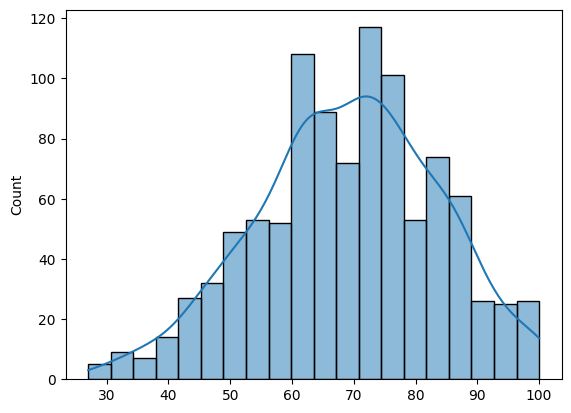

In [14]:
sea.histplot(reading, kde=True)

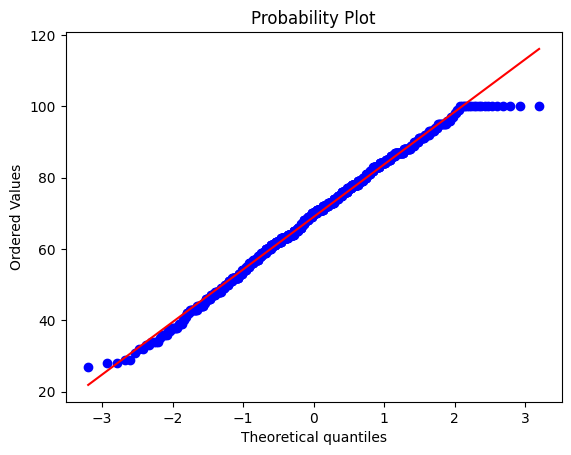

In [15]:
stats.probplot(x=reading, dist='norm', plot=plt)
plt.show()

<Axes: >

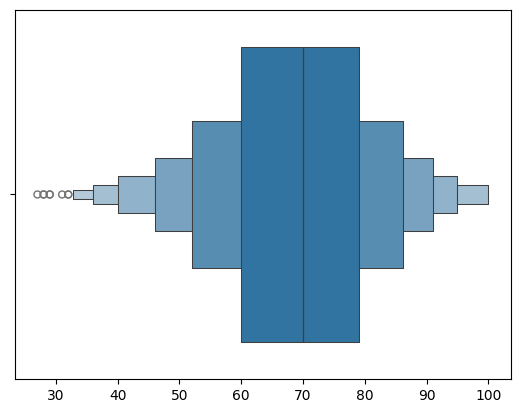

In [16]:
sea.boxenplot(reading, orient='h')

In [17]:
diagnostic.lilliefors(reading)

(0.036995518412346495, 0.004039757192379477)

### Intervalo de confiança de desvio padrão

$\alpha(\chi_r) = \frac{1-nivelDeConfianca}{2}$ \
$\alpha(\chi_r) = \frac{1+nivelDeConfianca}{2}$


In [66]:
random  = np.random.RandomState(seed=42)
amostra = random.choice(reading, size=30)
amostra

array([78, 87, 92, 72, 74, 52, 39, 76, 74, 87, 85, 80, 69, 69, 93, 65, 54,
       44, 78, 75, 65, 81, 60, 70, 68, 61, 55, 86, 51, 76])

In [69]:
tam = len(amostra)
S = np.var(amostra)
S

186.18222222222224

nivel de confiança de 95%

In [128]:

alpha_R = ( 1 - (99/100))/2
alpha_L = ( 1 + (99/100))/2
print(alpha_R, alpha_L)

Chi_R = stats.chi2.ppf(alpha_R, tam-1)
Chi_L = stats.chi2.ppf(alpha_L, tam-1)
Chi_R, Chi_L

0.0050000000000000044 0.995


(12.461335948002569, 50.993376268499446)

In [129]:
sup = ((tam - 1)*(S))/(Chi_R) 
inf = ((tam - 1)*(S))/(Chi_L)

In [130]:
R = F'''
{np.sqrt(inf)} < \sigma < { np.sqrt(sup) }
'''
print(R)
print(np.std(reading))


10.11093309701299 < \sigma < 20.4534144344215

14.729901425332079
